# 0.0. IMPORTS

In [1]:
import math
import numpy  as np
import pandas as pd
import inflection

import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image

from datetime import datetime
from datetime import timedelta


## 0.0 Change Themes

In [2]:
# Para ver lista de temas
# jt -l
# Available Themes:
#    chesterish
#    grade3
#    gruvboxd
#    gruvboxl
#    monokai
#    oceans16
#    onedork
#    solarizedd
#    solarizedl
# Para setar um tema
# !jt -t solarizedd -T -N -kl
# Para resetar o tema
# !jt -r

In [3]:
# !jt -t gruvboxd -T -N -kl

## 0.1. Helper Functions

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    #pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [5]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


/Users/igor/.pyenv/versions/3.8.0/envs/venv_ds-em-producao/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## 0.2. Loading data

In [6]:
# df_sales_raw = pd.read_csv( '../data/train.csv', low_memory=False )
# df_store_raw = pd.read_csv( '../data/store.csv', low_memory=False )
df_sales_raw = pd.read_csv( 'data/train.csv', low_memory=False )
df_store_raw = pd.read_csv( 'data/store.csv', low_memory=False )

# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store' )

# 1.0. PASSO 01 - DESCRICAO DOS DADOS

In [7]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [8]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

## 1.2. Data Dimensions

In [9]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Data Types

In [10]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [11]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

O código original estava demorando 4 minutos para ser executado. 
O novo código, utilizando o comando loc e str.split foi executado em 7 segundos.

In [12]:
# 08/05/22: Vou usar um dataframe auxiliar para fazer os preenchimentos de células vazias. Tentei substituir os valores no dataframe original e estava tendo problemas.
df_aux = df1

In [13]:
# df1.sample()
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


O código original estava demorando 4 minutos para ser executado. 
O novo código, utilizando o comando loc e str.split foi executado em 7 segundos.

In [14]:
#competition_distance        

df1.loc[df1.competition_distance.isna(),'competition_distance'] = 200000.0

#competition_open_since_month

df1['competition_open_since_month'] = np.where(df_aux['competition_open_since_month'].isna() == True, df_aux.date.dt.month, df_aux['competition_open_since_month'])

#competition_open_since_year 

df1['competition_open_since_year'] = np.where(df_aux['competition_open_since_year'].isna() == True, df_aux.date.dt.year, df_aux['competition_open_since_year'])

#promo2_since_week          

df1['promo2_since_week'] = np.where(df_aux['promo2_since_week'].isna() == True, df_aux.date.dt.week, df_aux['promo2_since_week'])

#promo2_since_year    

df1['promo2_since_year'] = np.where(df_aux['promo2_since_year'].isna() == True, df_aux.date.dt.year, df_aux['promo2_since_year'])

#promo_interval              
month_map = {1: 'Jan',  2: 'Feb',  3: 'Mar',  4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sept',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1[['m1','m2','m3','m4']] = df1['promo_interval'].str.split( ',' , expand = True)
df1['is_promo3'] = 0
df1.loc[(df1.month_map == df1.m1) | (df1.month_map == df1.m2 ) | (df1.month_map == df1.m3 ) | (df1.month_map == df1.m4), 'is_promo3' ] = 1

df1.drop(columns=['m1','m2','m3','m4'],inplace=True)

df1.head(20)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo3
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,31.0,2015.0,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,31.0,2015.0,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,31.0,2015.0,0,Jul,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,31.0,2015.0,0,Jul,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,31.0,2015.0,0,Jul,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,31.0,2015.0,0,Jul,0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,31.0,2015.0,0,Jul,0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,31.0,2015.0,0,Jul,0


In [15]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo3                       0
dtype: int64

## 1.6. Change Data Types

In [16]:
# competiton
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
    
# promo2
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## 1.7. Descriptive Statistics

In [17]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.7.1. Numerical Atributes

In [18]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


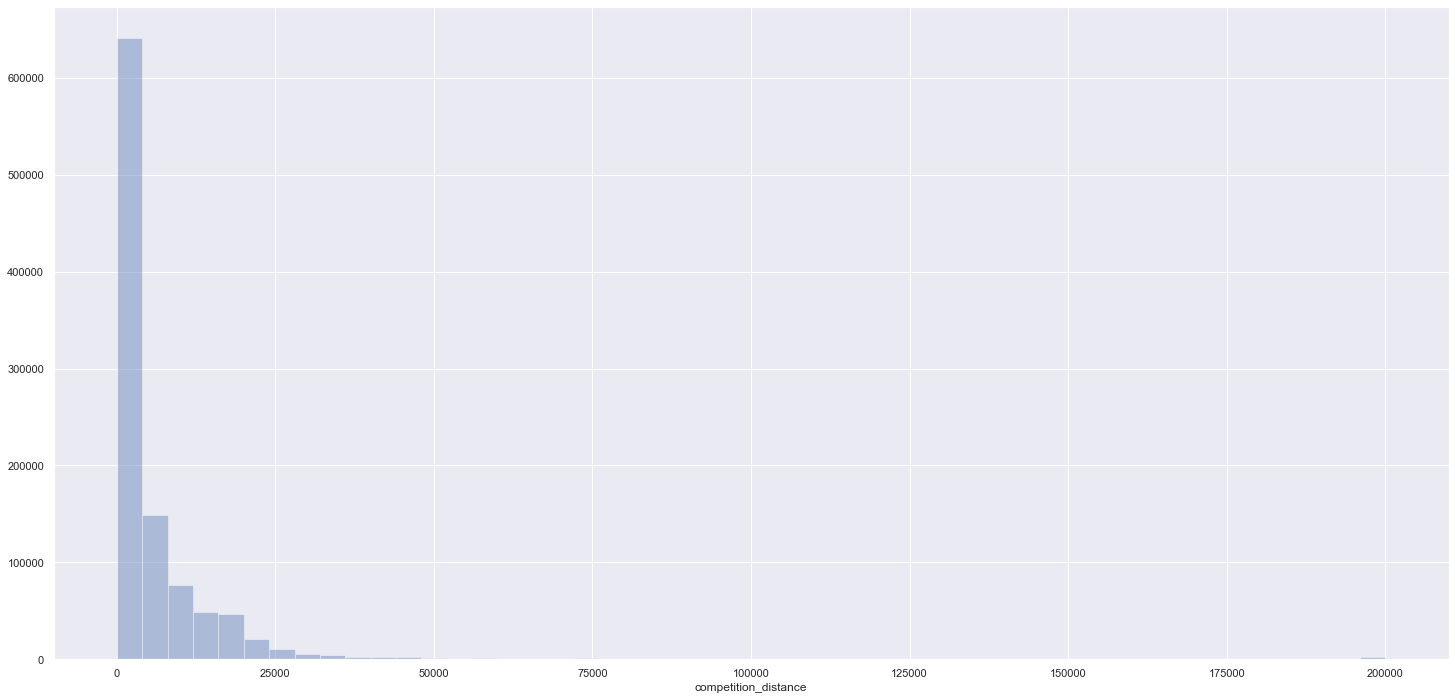

In [19]:
sns.distplot( df1['competition_distance'], kde=False )

Outra forma de fazer a tabela de estatísticas

In [20]:
num_attributes.agg(["mean","median","std","min","max","skew","kurtosis"]).T

,mean,median,std,min,max,skew,kurtosis
store,558.429727,558.0,321.908651,1.0,1115.0,-0.000955,-1.200524
day_of_week,3.998341,4.0,1.997391,1.0,7.0,0.001593,-1.246873
sales,5773.818972,5744.0,3849.926175,0.0,41551.0,0.641460,1.778375
customers,633.145946,609.0,464.411734,0.0,7388.0,1.598650,7.091773
open,0.830107,1.0,0.375539,0.0,1.0,-1.758045,1.090723
promo,0.381515,0.0,0.485759,0.0,1.0,0.487838,-1.762018
school_holiday,0.178647,0.0,0.383056,0.0,1.0,1.677842,0.815154
competition_distance,5935.442677,2330.0,12547.652996,20.0,200000.0,10.242344,147.789712
competition_open_since_month,6.786849,7.0,3.311087,1.0,12.0,-0.042076,-1.232607
competition_open_since_year,2010.324840,2012.0,5.515593,1900.0,2015.0,-7.235657,124.071304


### 1.7.2. Categorical Atributes

In [21]:
cat_attributes

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul
...,...,...,...,...,...
1017204,a,a,a,"Jan,Apr,Jul,Oct",Jan
1017205,a,c,c,0,Jan
1017206,a,a,c,0,Jan
1017207,a,a,c,0,Jan


In [22]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [23]:
cat_attributes.state_holiday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [24]:
cat_attributes.state_holiday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: state_holiday, dtype: int64

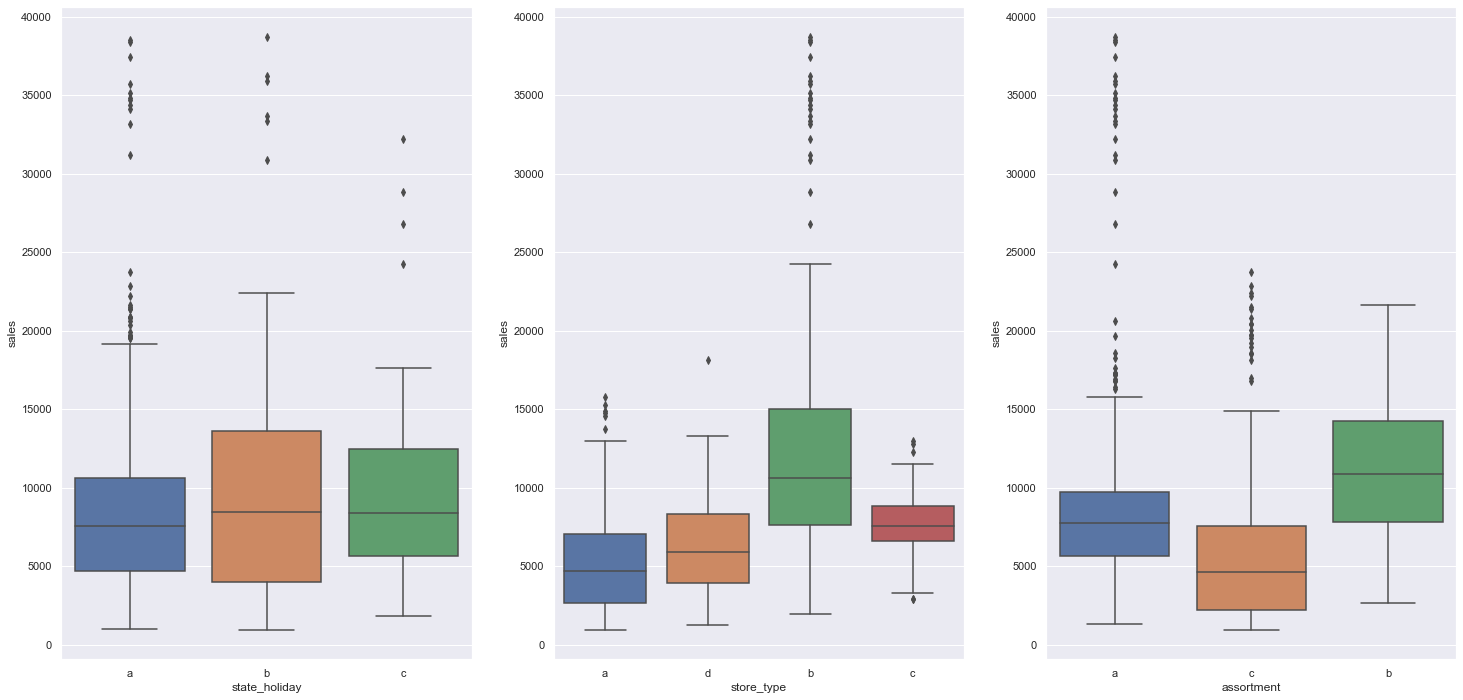

In [25]:
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux )

# 2.0. PASSO 02 - FEATURE ENGINEERING

In [26]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

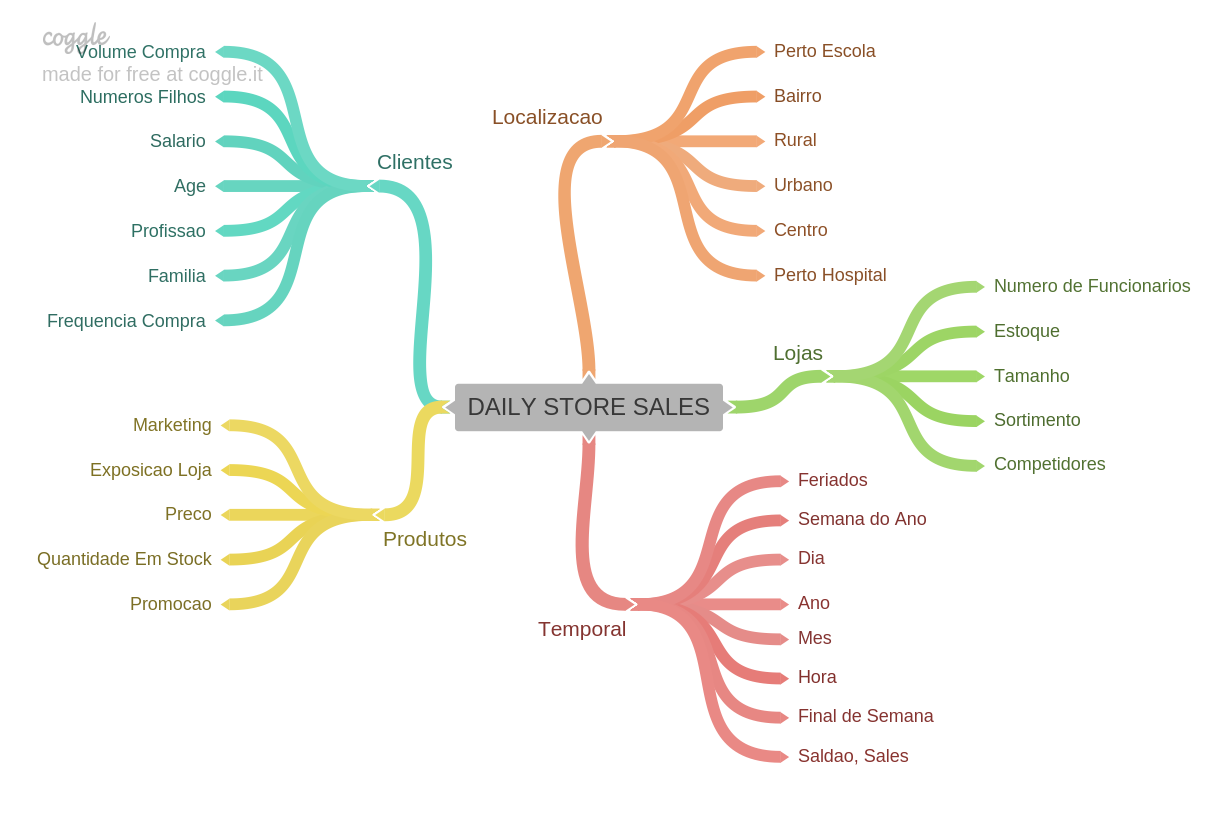

In [27]:
Image( 'img/MindMapHypothesis.png' )

## 2.2. Criacao das Hipoteses

### 2.2.1. Hipoteses Loja

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.2. Hipoteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**5.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3. Hipoteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3. Lista Final de Hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

**8.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**9.** Lojas deveriam vender mais ao longo dos anos.

**10.** Lojas deveriam vender mais no segundo semestre do ano.

**11.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**12.** Lojas deveriam vender menos aos finais de semana.

**13.** Lojas deveriam vender menos durante os feriados escolares.


## 2.4. Feature Engineering

Otimizei essa parte
Tempo de Execução : 24.5s
Tempo de Execução original: 4m

In [28]:
# A criação das 5 primeiras colunas leva 18s no VS Code. No Jupyter leva 15s.
# Não sei se é possível otimizar esse trecho

# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

# Tempo de execução: 3.64s
# competition since
# Criando a data completa de início da competição
aux_str = df2['competition_open_since_year'].astype(str) + '-' + df2['competition_open_since_month'].astype(str) + '-1'
df2['competition_since'] = pd.to_datetime(aux_str)

# Tempo de execução: 367ms
aux_delta_days = ( df2['date'] - df2['competition_since'] )
df2['competition_time_month'] = (aux_delta_days/30).dt.days

# Tempo de execução 3.6s
aux_str = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str ) + '-1'
df2['promo_since'] = pd.to_datetime(aux_str,format="%Y-%W-%w") - timedelta(7)

# Tempo de execução: 388ms
aux_delta_days = ( df2['date'] - df2['promo_since'] )
df2['promo_time_week'] = (aux_delta_days/7).dt.days

# Tempo de execução: 443ms
df2['assortment'] = 'basic'
df2.loc[df1.assortment == 'b', 'assortment'] = 'extra'
df2.loc[df1.assortment == 'c', 'assortment'] = 'extended'

# Tempo de Execução 393ms
df2['state_holiday'] = 'regular_day'
df2.loc[df1.state_holiday == 'a', 'state_holiday'] = 'public_holiday'
df2.loc[df1.state_holiday == 'b', 'state_holiday'] = 'easter_holiday'
df2.loc[df1.state_holiday == 'c', 'state_holiday'] = 'christmas'

### competition since
### Criando a data completa de início da competição

In [29]:
# Tempo de execução: 3.64s
# competition since
# Criando a data completa de início da competição
# aux_str = df2['competition_open_since_year'].astype(str) + '-' + df2['competition_open_since_month'].astype(str) + '-1'
# df2['competition_since2'] = pd.to_datetime(aux_str)
# df2[['competition_since','competition_open_since_year','competition_open_since_month','competition_since2']]

In [30]:
df2[['competition_since','competition_open_since_year','competition_open_since_month','competition_since2']].info()

KeyError: "['competition_since2'] not in index"

In [ ]:
aux = df2['competition_open_since_year'][0].astype(str) + '-' + df2['competition_open_since_month'][0].astype(str) + '-' + '1'
aux 

In [ ]:
aux_dt = pd.to_datetime(aux)
aux_dt

In [ ]:
df2['competition_since'][0]

In [ ]:
#aux = df2['competition_open_since_year'][0].astype(str) + '-' + df2['competition_open_since_month'][0].astype(str) + '-' + '1'
aux = df2['competition_open_since_year'].astype(str) + '-' + df2['competition_open_since_month'].astype(str) + '-' + '1'
aux

In [ ]:
aux_dt = pd.to_datetime(aux)
aux_dt

In [ ]:
# Tempo de execução: 51s
# competition since
# Criando a data completa de início da competição
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )

In [ ]:
df2[['competition_since','competition_open_since_year','competition_open_since_month']]

### df2['competition_time_month']

In [ ]:
# Tempo de execução: 367ms
# aux_delta_days = ( df2['date'] - df2['competition_since'] )
# df2['competition_time_month2'] = (aux_delta_days/30).dt.days
# df2[['competition_time_month', 'date', 'competition_since', 'competition_time_month2' ]]

In [ ]:
# Para uma linha
aux_delta_days = ( df2['date'][0] - df2['competition_since'][0] )
print(aux_delta_days)
aux_delta_months = aux_delta_days/30
print(aux_delta_months)

In [ ]:
aux_delta_days = ( df2['date'] - df2['competition_since'] )
aux_delta_months = (aux_delta_days/30).dt.days
print(aux_delta_months)


In [ ]:
df2[['competition_time_month', 'date', 'competition_since' ]]

In [ ]:
# Tempo de execução: 20.3s
# Cria a coluna de quantidade de meses desde que existe competição. 
# A subtração de datas gera uma variável do tipo Timedelta('2524 days 00:00:00')
# Para retirar o número de meses, ela é dividida por 30 e depois a função days é aplicada em todas as linhas

df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

### promo since

In [ ]:
# Tempo de execução 3.6s
# aux_str = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str ) + '-1'
# df2['promo_since2'] = pd.to_datetime(aux_str,format="%Y-%W-%w") - timedelta(7)
# df2[['promo2_since_year','promo2_since_week','promo_since','promo_since2']]

In [ ]:
# aux_str = df2['promo2_since_year'][0].astype( str ) + '-' + df2['promo2_since_week'][0].astype( str )
# aux_str

In [ ]:
# aux_dt = pd.to_datetime(aux_str,format='%Y-%W')
# aux_dt

In [ ]:
# aux_str = df2['promo2_since_year'][0].astype( str ) + '-' + df2['promo2_since_week'][0].astype( str ) + '-1'
# aux_str

In [ ]:
# aux_dt = pd.to_datetime(aux_str,format="%Y-%W-%w")
# aux_dt

In [ ]:
# df2[['promo2_since_year','promo2_since_week','promo_since']]

In [ ]:
# Tempo de execução 27.7s

# promo since
# df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
# # Antes de importar datetime precisava escrever datetime.datetime.strptime e datetime.timedelta
# #df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
# df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - timedelta( days=7 ) )

### 'promo_time_week'

In [ ]:
# Tempo de execução: 388ms
# aux_delta_days = ( df2['date'] - df2['promo_since'] )
# df2['promo_time_week2'] = (aux_delta_days/7).dt.days
# df2[['date', 'promo_since', 'promo_time_week', 'promo_time_week2' ]]

In [ ]:
# Tempo de execução: 21.7s
# Mesma lógica da coluna 'competition_time_month'
# df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

### assortment e state holiday

In [ ]:
# Tempo de execução: 443ms
# df2['assortment2'] = 'basic'
# df2.loc[df1.assortment == 'b', 'assortment2'] = 'extra'
# df2.loc[df1.assortment == 'c', 'assortment2'] = 'extended'

# # state holiday
# df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )

In [ ]:
# df2['state_holiday2'] = 'regular_day'
# df2.loc[df1.state_holiday == 'a', 'state_holiday2'] = 'public_holiday'
# df2.loc[df1.state_holiday == 'b', 'state_holiday2'] = 'easter_holiday'
# df2.loc[df1.state_holiday == 'c', 'state_holiday2'] = 'christmas'

In [ ]:
# df2.state_holiday.value_counts()

In [ ]:
# df2[['assortment','assortment2','state_holiday','state_holiday2']]

In [ ]:
# df1.assortment.value_counts()

In [ ]:
# # Tempo de execução: 606ms
# # assortment
# df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

# # state holiday
# df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )

### Código original 
Levando 4 minutos para rodar

In [ ]:
# # year
# df2['year'] = df2['date'].dt.year

# # month
# df2['month'] = df2['date'].dt.month

# # day
# df2['day'] = df2['date'].dt.day

# # week of year
# df2['week_of_year'] = df2['date'].dt.weekofyear

# # year week
# df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

# # competition since
# # Criando a data completa de início da competição
# df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )

# # Cria a coluna de quantidade de meses desde que existe competição. 
# # A subtração de datas gera uma variável do tipo Timedelta('2524 days 00:00:00')
# # Para retirar o número de meses, ela é dividida por 30 e depois a função days é aplicada em todas as linhas

# df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

# # promo since
# df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
# # Antes de importar datetime precisava escrever datetime.datetime.strptime e datetime.timedelta
# #df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
# df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.strptime( x + '-1', '%Y-%W-%w' ) - timedelta( days=7 ) )

# # Mesma lógica da coluna 'competition_time_month'
# df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

# # assortment
# df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

# # state holiday
# df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )

# 3.0. PASSO 03 - FILTRAGEM DE VARIÁVEIS

In [32]:
df3 = df2.copy()

In [33]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo3,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1. Filtragem das Linhas


In [34]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2. Selecao das Colunas

In [35]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis=1 )

# 4.0 PASSO 04 - ANÁLISE EXPLORATÓRIA DOS DADOS

In [36]:
df4 = df3.copy()

## 4.1 Análise Univariada

### 4.1.1 Response Variables

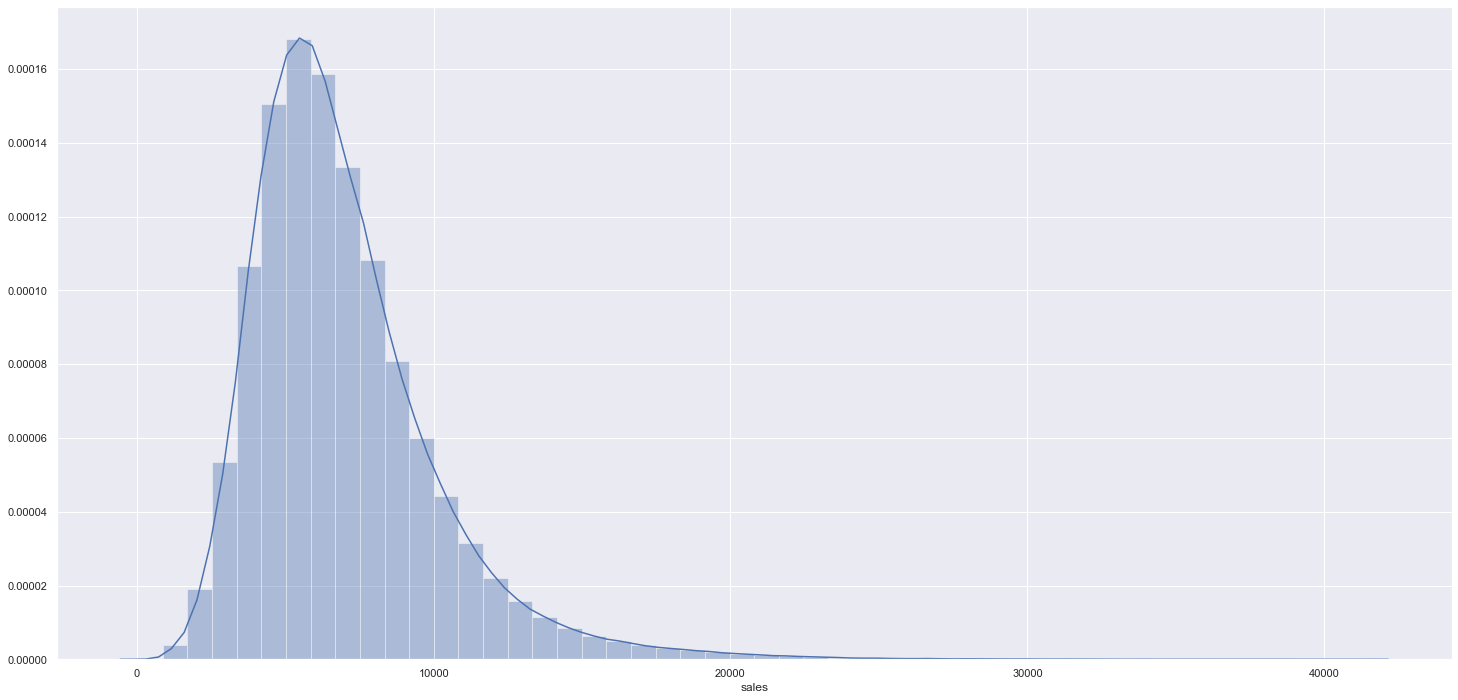

In [37]:
# Plot de densidade de distribuição
sns.distplot(df4.sales)

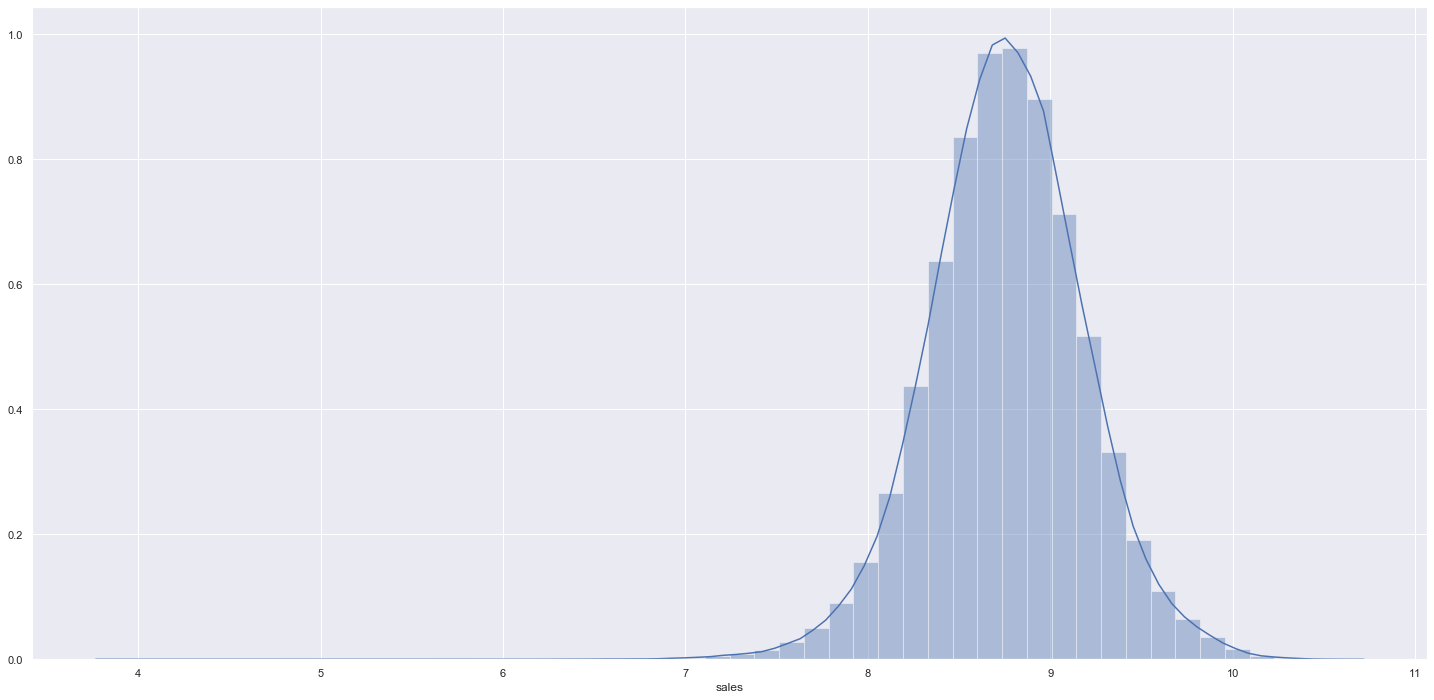

In [38]:
# Transformação possível
sns.distplot(np.log1p(df4.sales))

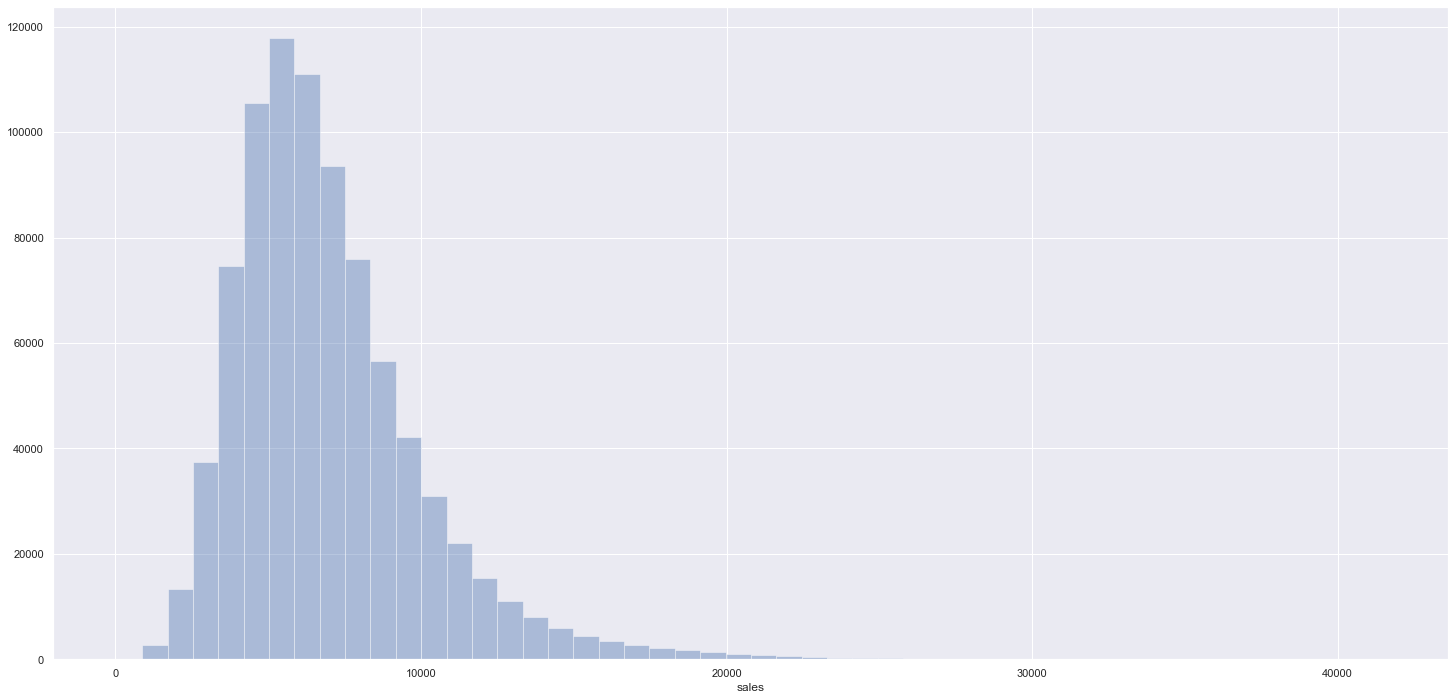

In [39]:
# Plot de histograma
sns.distplot(df4.sales, kde = False)

### 4.1.2 Numerical Variables

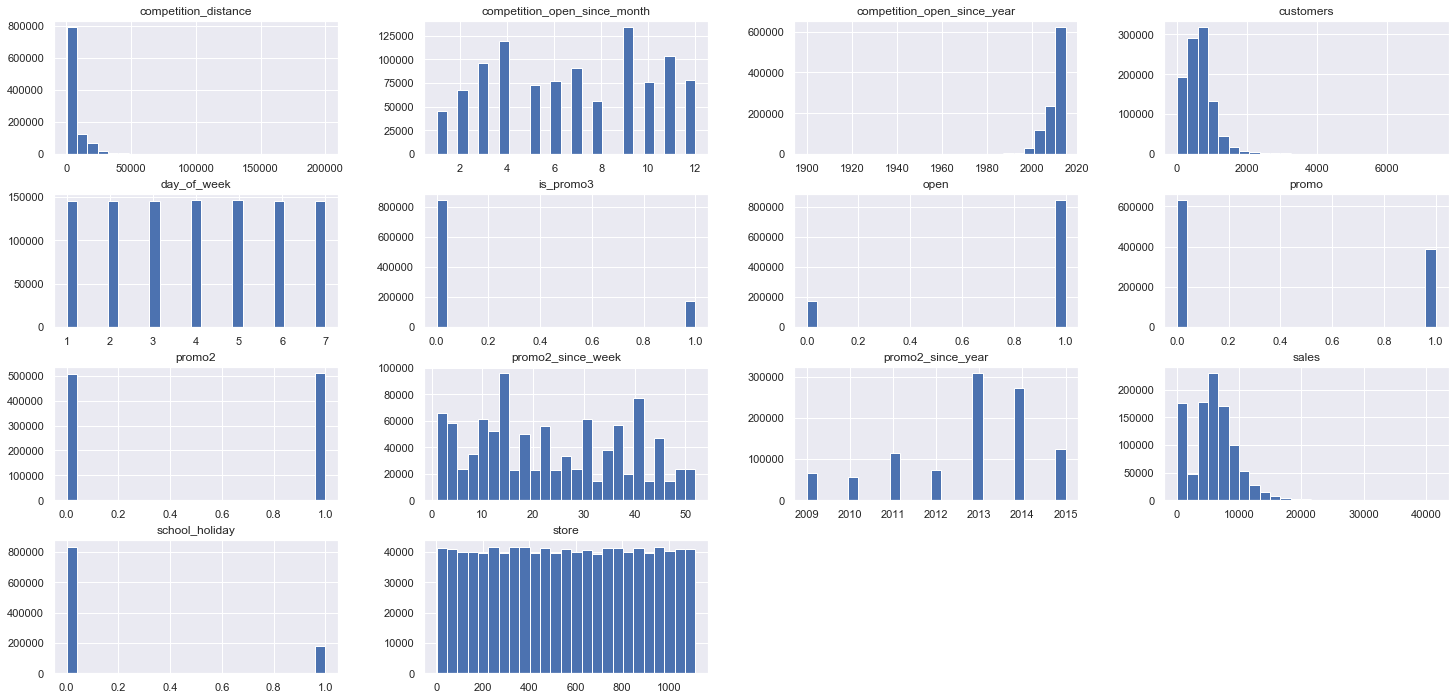

In [40]:
num_attributes.hist(bins=25);

### 4.1.3 Categorical Variable 

In [41]:
cat_attributes

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul
...,...,...,...,...,...
1017204,a,a,a,"Jan,Apr,Jul,Oct",Jan
1017205,a,c,c,0,Jan
1017206,a,a,c,0,Jan
1017207,a,a,c,0,Jan


In [42]:
df4.state_holiday.value_counts()

regular_day       843428
public_holiday       694
easter_holiday       145
christmas             71
Name: state_holiday, dtype: int64

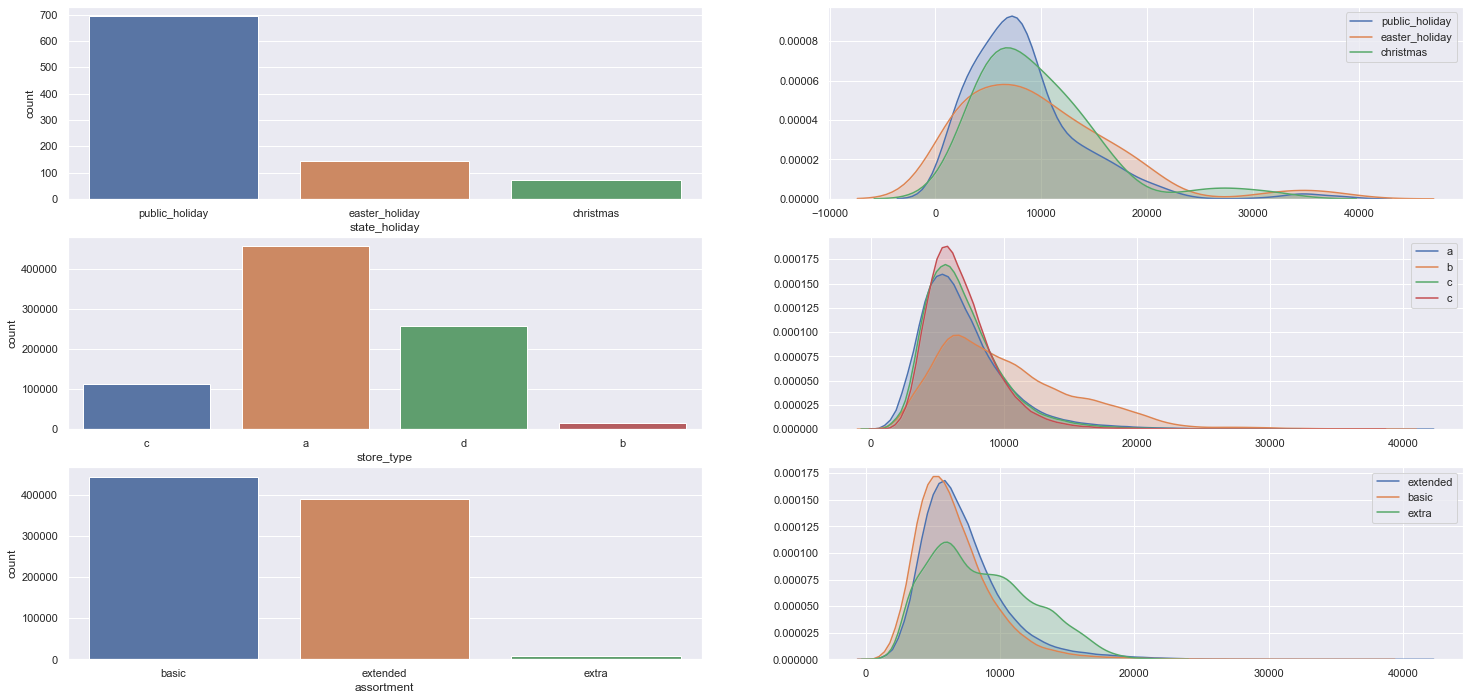

In [43]:
# state_holiday
plt.subplot(3,2,1)
# Filtragem necessária pois há muito mais 'regular_day' que outros tipos
a = df4.loc[df4.state_holiday!='regular_day']

sns.countplot(a.state_holiday)

plt.subplot(3,2,2)
sns.kdeplot(df4.loc[df4.state_holiday=='public_holiday','sales'], label='public_holiday', shade=True )
sns.kdeplot(df4.loc[df4.state_holiday=='easter_holiday','sales'], label='easter_holiday', shade=True )
sns.kdeplot(df4.loc[df4.state_holiday=='christmas','sales'], label='christmas', shade=True )

# store_type
plt.subplot(3,2,3)

sns.countplot(df4.store_type)

plt.subplot(3,2,4)
sns.kdeplot(df4.loc[df4.store_type=='a','sales'], label='a', shade=True )
sns.kdeplot(df4.loc[df4.store_type=='b','sales'], label='b', shade=True )
sns.kdeplot(df4.loc[df4.store_type=='c','sales'], label='c', shade=True )
sns.kdeplot(df4.loc[df4.store_type=='d','sales'], label='c', shade=True )

# assortment
plt.subplot(3,2,5)

sns.countplot(df4.assortment)

plt.subplot(3,2,6)
sns.kdeplot(df4.loc[df4.assortment=='extended','sales'], label='extended', shade=True )
sns.kdeplot(df4.loc[df4.assortment=='basic','sales'], label='basic', shade=True )
sns.kdeplot(df4.loc[df4.assortment=='extra','sales'], label='extra', shade=True )


## 4.2 Análise Bivariada

### H1. Lojas com maior sortimento deveriam vender mais.

Essa hipótese me parece correta mas Meigarom concluiu que ela está errada pois fez um gráfico com a soma de todas as lojas de cada tipo. Como tem menos lojas do tipo Extra, a soma total deu menor que dos outros tipos. Porém se as médias forem olhadas, a hipótese será confirmada.

O número de lojas do tipo Extra é muito menor que dos outros tipos

In [48]:
df4.assortment.value_counts()

basic       444875
extended    391254
extra         8209
Name: assortment, dtype: int64

In [44]:
aux1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()
aux2 = df4[['assortment','sales']].groupby('assortment').mean().reset_index()
display(aux1)
display(aux2)

,assortment,sales
0,basic,2945750070
1,extended,2856484241
2,extra,70946312


,assortment,sales
0,basic,6621.523057
1,extended,7300.843547
2,extra,8642.503594


Text(0.5, 1.0, 'Média de vendas')

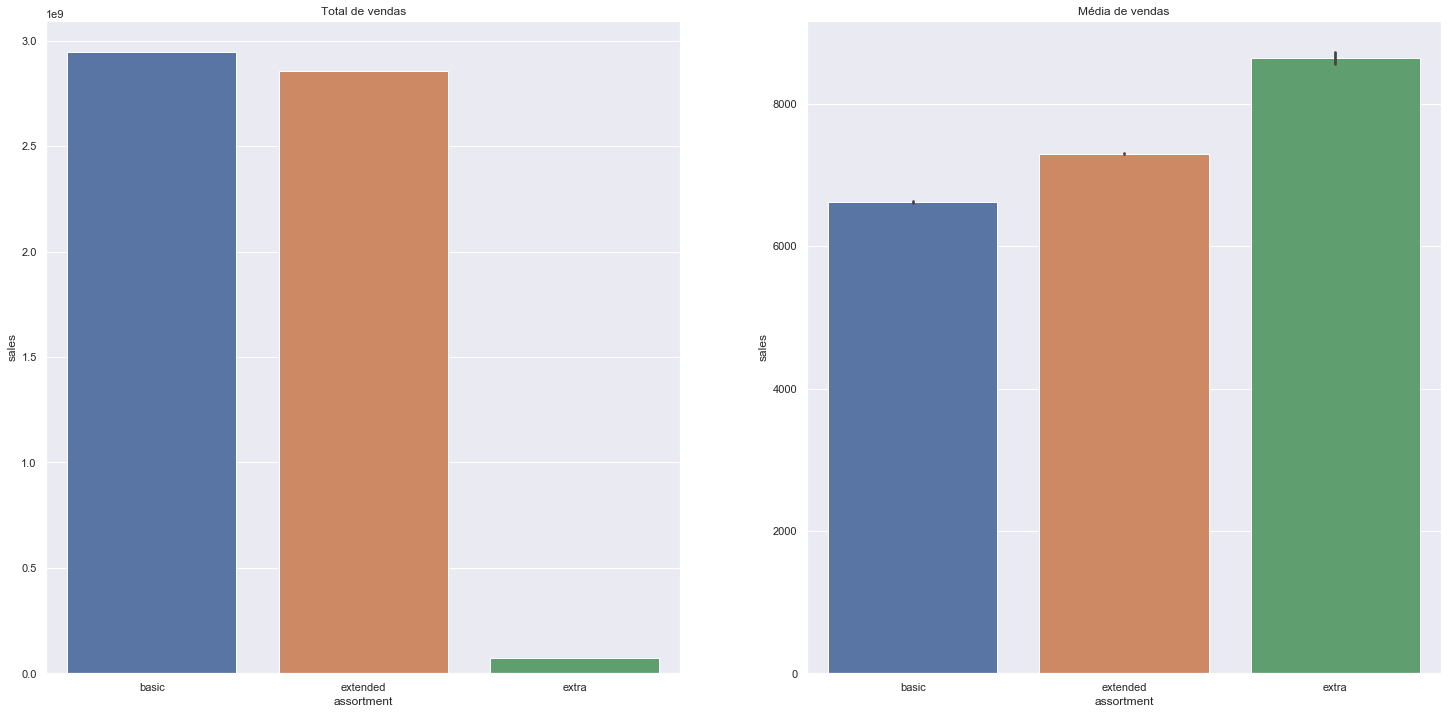

In [47]:
# Total de vendas para cada tipo
subplot(1,2,1)
sns.barplot(x='assortment',y='sales',data=aux1)
plt.title('Total de vendas')

# Média de vendas para cada tipo
subplot(1,2,2)
sns.barplot(x='assortment',y='sales',data=df4)
plt.title('Média de vendas')

In [70]:
aux3 = df4[['assortment','year_week','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux4 = df4[['assortment','year_week','sales']].groupby(['year_week','assortment']).mean().reset_index()
display( aux3 )
display( aux4 )

,year_week,assortment,sales
0,2013-00,basic,13434262
1,2013-00,extended,12425669
2,2013-00,extra,269404
3,2013-01,basic,26007250
4,2013-01,extended,22917693
...,...,...,...
406,2015-29,extended,19570832
407,2015-29,extra,574020
408,2015-30,basic,23492454
409,2015-30,extended,23301780


,year_week,assortment,sales
0,2013-00,basic,5642.277194
1,2013-00,extended,6094.001471
2,2013-00,extra,5282.431373
3,2013-01,basic,7307.459961
4,2013-01,extended,7553.623270
...,...,...,...
406,2015-29,extended,6327.459425
407,2015-29,extra,9111.428571
408,2015-30,basic,7950.069036
409,2015-30,extended,9084.514620


In [72]:
display(aux3.pivot(index = 'year_week', columns = 'assortment', values = 'sales'))
display(aux4.pivot(index = 'year_week', columns = 'assortment', values = 'sales'))

assortment,basic,extended,extra
year_week,,,
2013-00,13434262,12425669,269404
2013-01,26007250,22917693,350279
2013-02,17970974,16029584,377207
2013-03,24392076,21243431,404662
2013-04,19972891,18130077,363061
...,...,...,...
2015-26,27840342,27165959,684180
2015-27,20356210,20449036,586036
2015-28,25746704,25629698,632017


assortment,basic,extended,extra
year_week,,,
2013-00,5642.277194,6094.001471,5282.431373
2013-01,7307.459961,7553.623270,6254.982143
2013-02,5049.444788,5283.317073,6286.783333
2013-03,6853.631919,6983.376397,6423.206349
2013-04,5611.939028,5944.287541,6483.232143
...,...,...,...
2015-26,7807.162647,8788.728243,10860.000000
2015-27,5710.016830,6624.242306,9302.158730
2015-28,7238.319933,8299.772668,10032.015873


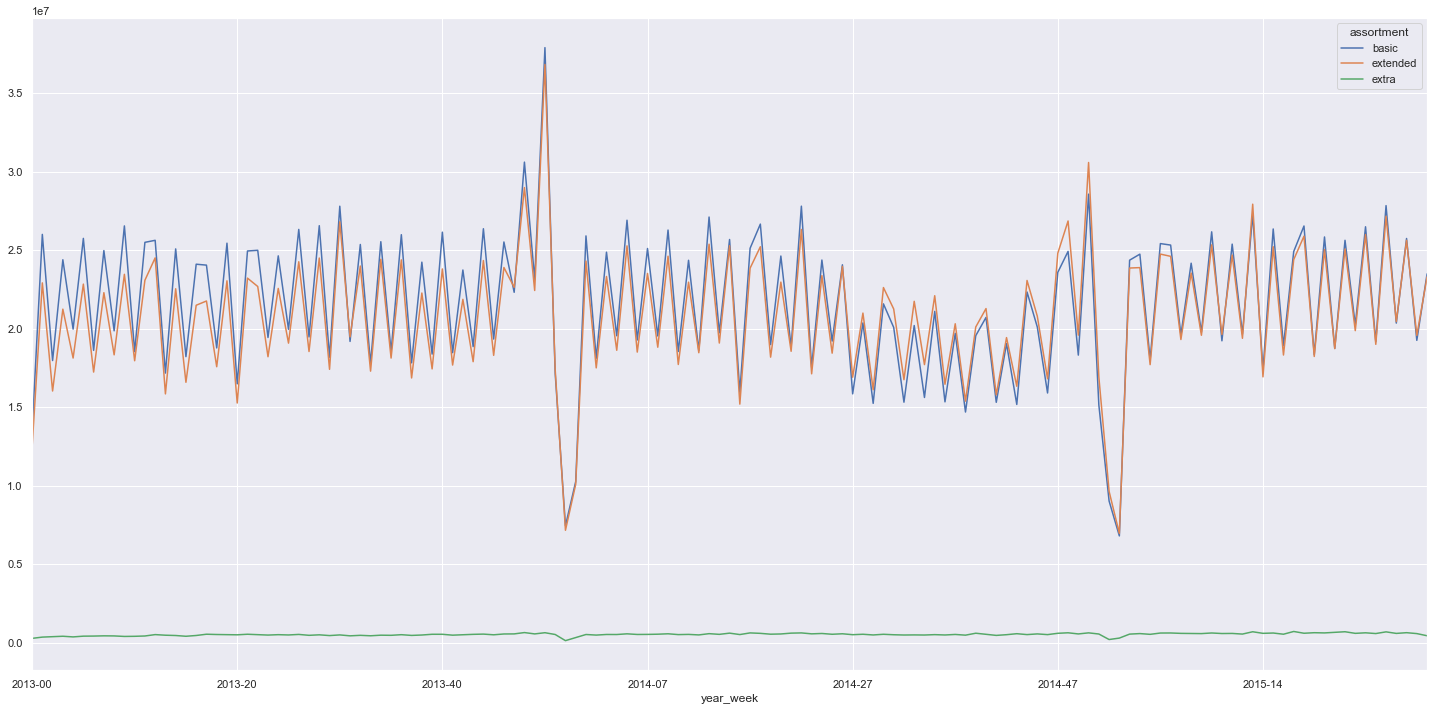

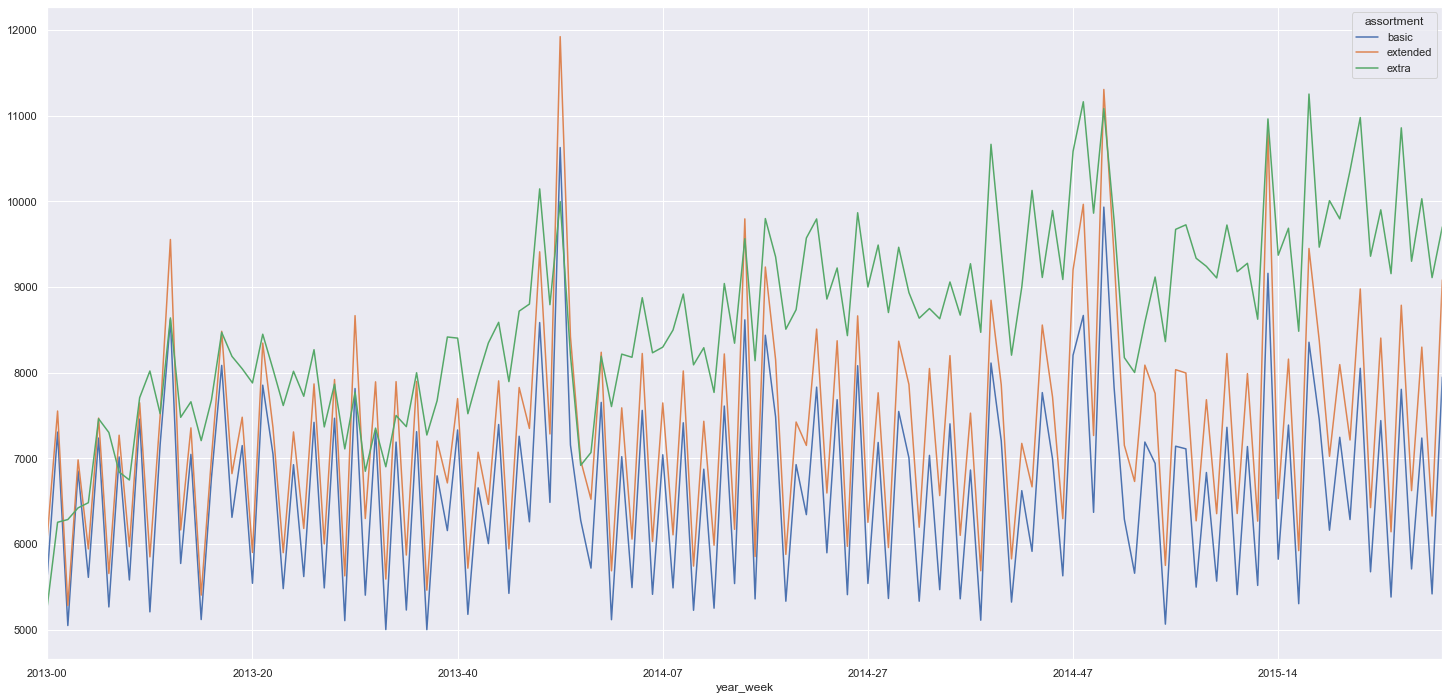

In [74]:
aux3.pivot(index = 'year_week', columns = 'assortment', values = 'sales').plot()
aux4.pivot(index = 'year_week', columns = 'assortment', values = 'sales').plot()

### H2. Lojas com competidores mais próximos deveriam vender menos.

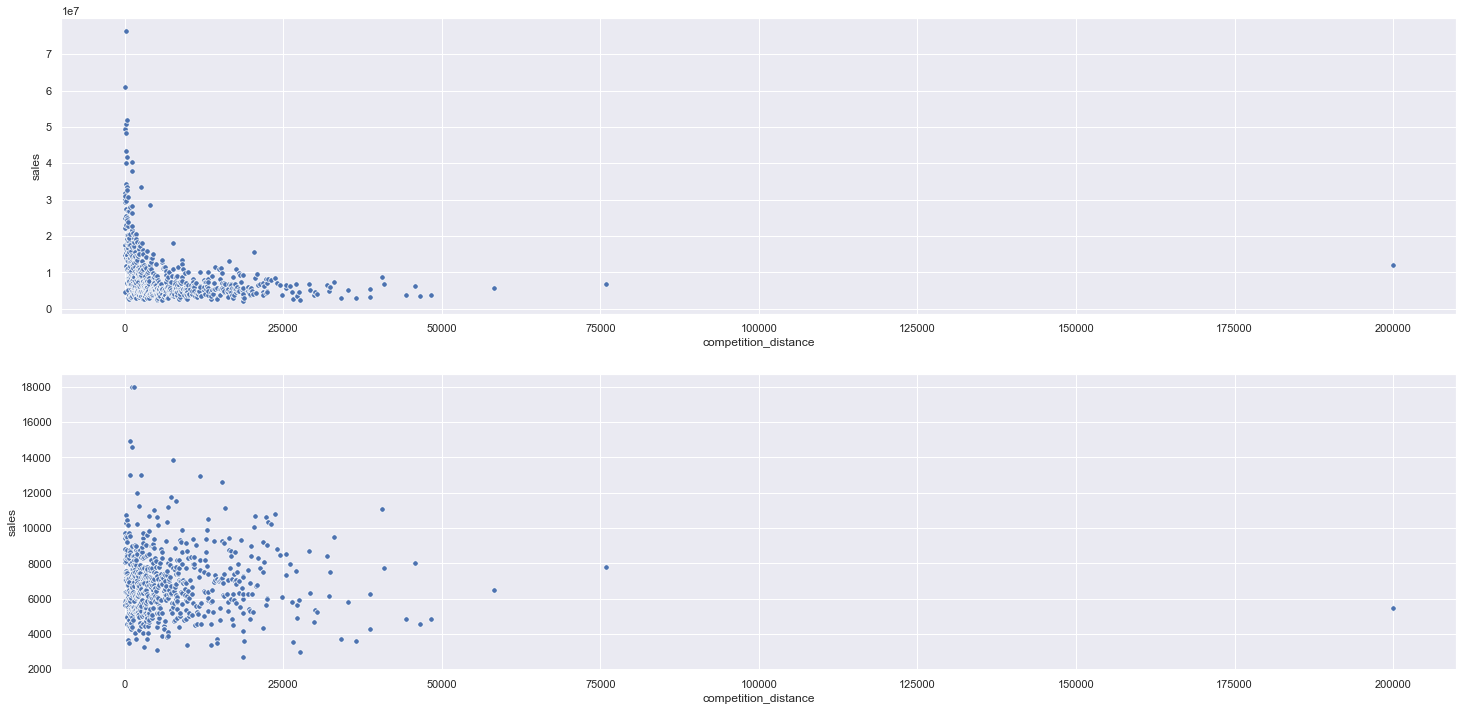

In [88]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
aux2 = df4[['competition_distance','sales']].groupby('competition_distance').mean().reset_index()
subplot(2,1,1)
sns.scatterplot(x='competition_distance',y='sales',data=aux1, s = 30)
subplot(2,1,2)
sns.scatterplot(x='competition_distance',y='sales',data=aux2, s = 30)

In [111]:
# Separando as distâncias em grupos de 1000
bins = np.arange(0,20001,1000)
aux1['competition_distance_binned'] = pd.cut(aux1.competition_distance,bins)

In [112]:
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
aux3 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').mean().reset_index()

display(aux2)
display(aux3)

,competition_distance_binned,sales
0,"(0, 1000]",1832415839
1,"(1000, 2000]",918682669
2,"(2000, 3000]",610405362
3,"(3000, 4000]",378745560
4,"(4000, 5000]",325665741
5,"(5000, 6000]",218735915
6,"(6000, 7000]",168769215
7,"(7000, 8000]",133211838
8,"(8000, 9000]",180027950
9,"(9000, 10000]",121250715


,competition_distance_binned,sales
0,"(0, 1000]",1.970340e+07
1,"(1000, 2000]",1.106847e+07
2,"(2000, 3000]",8.976549e+06
3,"(3000, 4000]",6.530096e+06
4,"(4000, 5000]",7.573622e+06
5,"(5000, 6000]",5.608613e+06
6,"(6000, 7000]",5.819628e+06
7,"(7000, 8000]",6.055084e+06
8,"(8000, 9000]",6.207860e+06
9,"(9000, 10000]",6.062536e+06


In [113]:
aux1.competition_distance_binned.value_counts()

(0, 1000]         93
(1000, 2000]      83
(2000, 3000]      68
(3000, 4000]      58
(4000, 5000]      43
(5000, 6000]      39
(8000, 9000]      29
(6000, 7000]      29
(7000, 8000]      22
(9000, 10000]     20
(18000, 19000]    14
(10000, 11000]    14
(13000, 14000]    13
(15000, 16000]    13
(16000, 17000]    12
(11000, 12000]    11
(17000, 18000]    11
(12000, 13000]    10
(14000, 15000]     9
(19000, 20000]     8
Name: competition_distance_binned, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

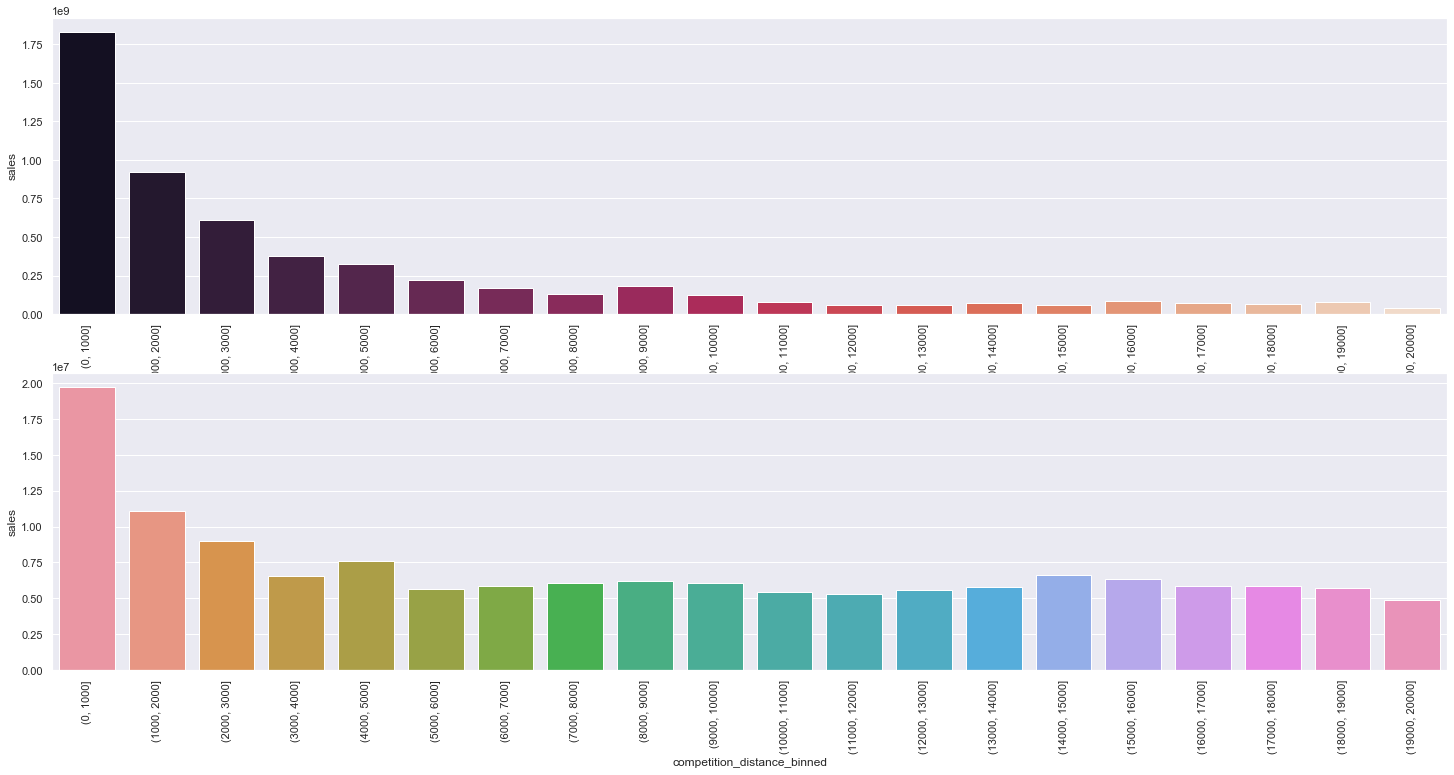

In [106]:
subplot(2,1,1)
sns.barplot(x='competition_distance_binned',y='sales',data=aux2,palette='rocket')
plt.xticks(rotation=90)
subplot(2,1,2)
sns.barplot(x='competition_distance_binned',y='sales',data=aux3)
plt.xticks(rotation=90)

In [101]:
sns.color_palette("rocket",n_colors=17)

[(0.08450105, 0.05559631, 0.15396203),
 (0.16342174, 0.0851396, 0.21088893),
 (0.24525608, 0.10497384, 0.26395596),
 (0.33067031, 0.11701189, 0.30632563),
 (0.42569057, 0.12178916, 0.33806605),
 (0.51728314, 0.1179558, 0.35453252),
 (0.61118304, 0.10450943, 0.35794557),
 (0.70457834, 0.0882129, 0.34473046),
 (0.7965014, 0.10506637, 0.31063031),
 (0.86641628, 0.17387796, 0.27070818),
 (0.91717106, 0.26773821, 0.24294137),
 (0.94291042, 0.37549479, 0.26369821),
 (0.95510255, 0.47787236, 0.32862553),
 (0.96173392, 0.57988594, 0.41844491),
 (0.96443322, 0.67025402, 0.51509334),
 (0.96656022, 0.75658231, 0.62527295),
 (0.97220061, 0.83905052, 0.74578903)]

In [114]:
# Separando as distâncias em grupos de 100
bins = np.arange(0,2001,100)
aux1['competition_distance_binned'] = pd.cut(aux1.competition_distance,bins)

In [115]:
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
aux3 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').mean().reset_index()

display(aux2)
display(aux3)

,competition_distance_binned,sales
0,"(0, 100]",253634332
1,"(100, 200]",309359104
2,"(200, 300]",292354777
3,"(300, 400]",230711878
4,"(400, 500]",193224393
5,"(500, 600]",152662375
6,"(600, 700]",104599382
7,"(700, 800]",112291855
8,"(800, 900]",112322148
9,"(900, 1000]",71255595


,competition_distance_binned,sales
0,"(0, 100]",2.818159e+07
1,"(100, 200]",3.093591e+07
2,"(200, 300]",2.923548e+07
3,"(300, 400]",2.307119e+07
4,"(400, 500]",1.932244e+07
5,"(500, 600]",1.526624e+07
6,"(600, 700]",1.045994e+07
7,"(700, 800]",1.403648e+07
8,"(800, 900]",1.404027e+07
9,"(900, 1000]",8.906949e+06


In [116]:
aux1.competition_distance_binned.value_counts()

(1100, 1200]    10
(100, 200]      10
(200, 300]      10
(300, 400]      10
(400, 500]      10
(500, 600]      10
(600, 700]      10
(1900, 2000]     9
(0, 100]         9
(1400, 1500]     9
(1600, 1700]     9
(1000, 1100]     8
(1800, 1900]     8
(800, 900]       8
(700, 800]       8
(1200, 1300]     8
(1300, 1400]     8
(900, 1000]      8
(1500, 1600]     7
(1700, 1800]     7
Name: competition_distance_binned, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

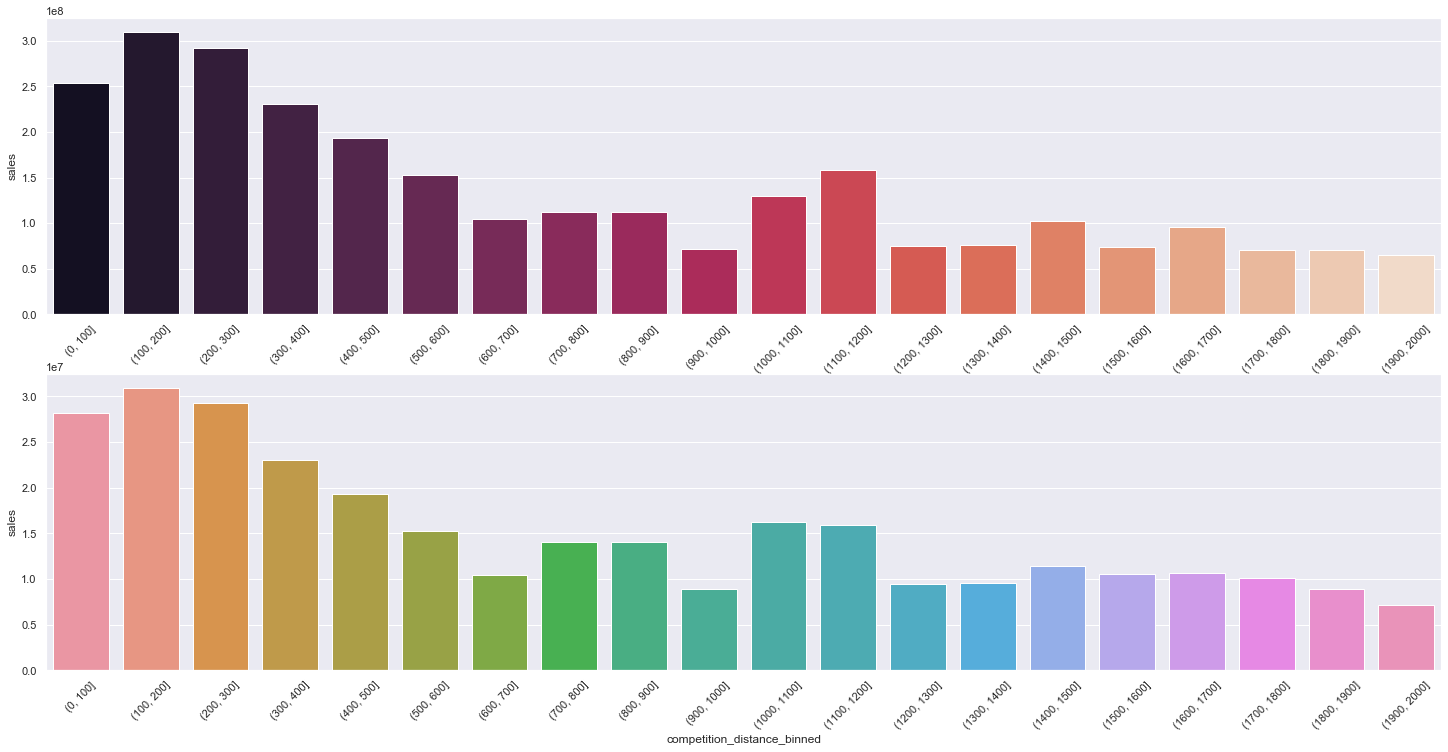

In [110]:
subplot(2,1,1)
sns.barplot(x='competition_distance_binned',y='sales',data=aux2,palette='rocket')
plt.xticks(rotation=45)
subplot(2,1,2)
sns.barplot(x='competition_distance_binned',y='sales',data=aux3)
plt.xticks(rotation=45)

### H3. Lojas com competidores há mais tempo deveriam vender mais.